### Vector Autoregressive

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Apr, 2023
Time:                     19:34:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -174.510
Nobs:                     1118.00    HQIC:                  -174.611
Log likelihood:           91332.2    FPE:                1.38313e-76
AIC:                     -174.672    Det(Omega_mle):     1.33948e-76
--------------------------------------------------------------------
Results for equation sine
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.000000         0.000000            0.025           0.980
L1.sine                       -0.395659         0.000158        -2505.280           0.000
L1.cosine                

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


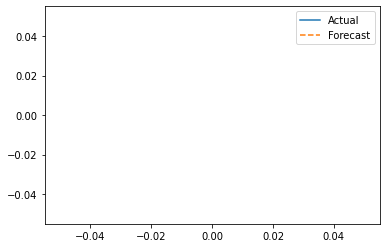

In [31]:
# Import the required packages
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Load the data
data = pd.read_csv("trig.csv", index_col=0)

# Convert the data to a time series object
ts_data = data
ts_data = data.iloc[:,0:5]
# ts_data.index = pd.to_datetime(ts_data.index)
# ts_data = ts_data.asfreq('MS')

# Split the data into training and test sets
train_size = 1000
train_data = ts_data[:800]
test_data = ts_data[800:]

# # Perform an Augmented Dickey-Fuller test on each variable to check for stationarity
# adf_test = adfuller(train_data, maxlag=1)
# adf_test_df = pd.DataFrame(adf_test[0:4], index=['Test Statistic', 'p-value'], columns=['Value'])
# adf_test_df.index.name = 'Augmented Dickey-Fuller Test'
# adf_test_df.columns.name = 'Variable'
# print(adf_test_df)

# Estimate the VAR model with 2 lags using the training data
var_model = VAR(train_data)
var_result = var_model.fit(2)

# Print the summary of the VAR model
print(var_result.summary())

# # Plot the lag order selection criterion
# print(var_result.plot_diagnostics())

# Forecast future values of the first variable in the VAR model using the test data
forecast = var_result.forecast(train_data.values[-2:], len(test_data))

# Calculate the Mean Absolute Error (MAE) of the forecast
mae = np.mean(np.abs(forecast[:,0] - test_data.values[:,0]))

# Plot the forecast and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.iloc[:,0], label='Actual')
plt.plot(forecast[:,0], label='Forecast', linestyle='--')
plt.legend()

# Print the MAE of the forecast
print("Mean Absolute Error:", round(mae, 2))